In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, LeaveOneOut, learning_curve
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import scipy.stats as stats


In [3]:
train=pd.read_csv("train.csv")

In [4]:
train.shape

(891, 12)

In [5]:

train.info

<bound method DataFrame.info of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                   

In [6]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
train['Ticket'].unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

In [11]:

split_tickets = train['Ticket'].str.split()
train['Ticket'] = split_tickets.apply(lambda x: [int(s) for s in x if s.isdigit()])


In [12]:
train.drop(columns='PassengerId',axis=1,inplace=True)

In [13]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,[21171],7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,[17599],71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,[3101282],7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,[113803],53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,[373450],8.0500,NaN,S


In [14]:
train['Ticket'].isna().sum()
train['Ticket'] = train['Ticket'].astype(str)
train['Ticket'] = train['Ticket'].str.replace('[', '', regex=False).str.replace(']', '', regex=False)




In [15]:
train.head()


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [16]:
train['Title'] = train['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
train['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [17]:
ticket_survival_counts = train.groupby('Survived')['Ticket'].count()
ticket_survival_counts = train['Survived'].value_counts()
total_tickets = ticket_survival_counts.sum()
survived_percentage = (ticket_survival_counts[1] / total_tickets) * 100
unsurvived_percentage = (ticket_survival_counts[0] / total_tickets) * 100
print(survived_percentage,"%")
print(unsurvived_percentage,"%")

38.38383838383838 %
61.61616161616161 %


Survived
0    549
1    342
Name: Ticket, dtype: int64


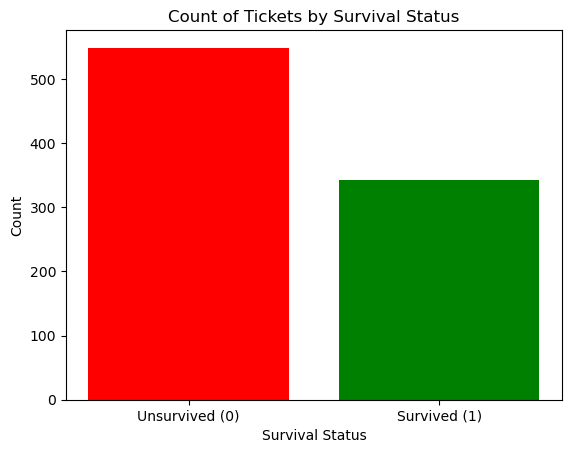

In [18]:
ticket_survival_counts = train.groupby('Survived')['Ticket'].count()
print(ticket_survival_counts)
plt.bar(ticket_survival_counts.index, ticket_survival_counts.values, color=['red', 'green'])
plt.xlabel('Survival Status')
plt.ylabel('Count')
plt.title('Count of Tickets by Survival Status')
plt.xticks(ticks=[0, 1], labels=['Unsurvived (0)', 'Survived (1)'])
plt.show()

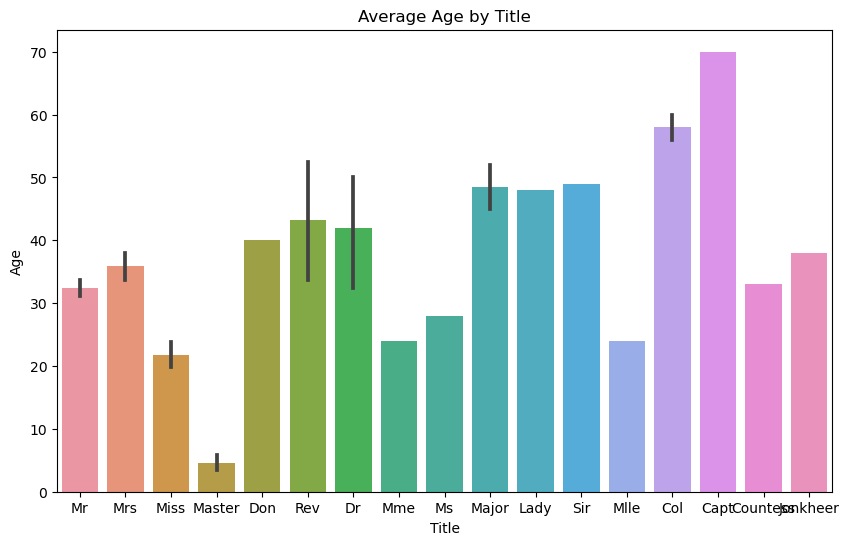

In [19]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Title', y='Age', data=train)
plt.title('Average Age by Title')
plt.xlabel('Title')
plt.ylabel('Age')
plt.show()

In [20]:
train['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [21]:
train['Age'] = train.groupby('Title')['Age'].transform(lambda x: x.fillna(x.mean()))

In [22]:
train['Parch'].isna().sum()


0

In [23]:
train['SibSp'].isna().sum()

0

In [24]:

train['Family'] = train['SibSp'] + train['Parch']
train['Family'] = train['Family'].apply(lambda x: 1 if x>0 else 0)

In [25]:
train['Embarked'].isna().sum()

2

In [26]:
train.dropna(subset=['Embarked'], inplace=True)


In [27]:
train['Embarked'].isna().sum()

0

In [28]:
train['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [29]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Family
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,21171,7.2500,NaN,S,Mr,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,17599,71.2833,C85,C,Mrs,1
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,3101282,7.9250,NaN,S,Miss,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,1
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,0


In [30]:
train['Cabin'].isna().mean()*100

77.27784026996626

In [31]:
train.drop(columns='Cabin',inplace=True)

In [32]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,Family
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,21171,7.2500,S,Mr,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,17599,71.2833,C,Mrs,1
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,3101282,7.9250,S,Miss,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs,1
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr,0


In [33]:
train2=train.copy()

In [34]:
train['Fare'].isna().sum()

0

In [35]:
embarked_dummies=pd.get_dummies(train['Embarked'],prefix='Embarked')
train=pd.concat([train,embarked_dummies],axis=1)

this will create the three new columns of Embarked like Embarked_c Embarked_Q Embarked_s and store value in the form of bolean ture or false. 

In [37]:
train['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [38]:
sex_dummes = pd.get_dummies(train['Sex'],prefix='Sex')
train=pd.concat([train,sex_dummes],axis=1)

this will create the two new colnums Sex_male and sex_female and stores values in the form of bolean.

In [40]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,Family,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,21171,7.2500,S,Mr,1,False,False,True,False,True
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,17599,71.2833,C,Mrs,1,True,False,False,True,False
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,3101282,7.9250,S,Miss,0,False,False,True,True,False
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs,1,False,False,True,True,False
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr,0,False,False,True,False,True


In [41]:
train1=train.copy()

In [42]:
del_columns=['Name','Sex','SibSp','Parch','Ticket','Embarked','Title','Embarked_C','Sex_female']
train1.drop(columns=del_columns, inplace=True)

In [43]:
train1.head()

,Survived,Pclass,Age,Fare,Family,Embarked_Q,Embarked_S,Sex_male
0,0,3,22.0,7.2500,1,False,True,True
1,1,1,38.0,71.2833,1,False,False,False
2,1,3,26.0,7.9250,0,False,True,False
3,1,1,35.0,53.1000,1,False,True,False
4,0,3,35.0,8.0500,0,False,True,True


In [44]:
train1=train1.rename(columns={'Family':'FamilySize'})

In [45]:
train1.isna().sum()

Survived      0
Pclass        0
Age           0
Fare          0
FamilySize    0
Embarked_Q    0
Embarked_S    0
Sex_male      0
dtype: int64

In [46]:
train1 = train1[['Survived', 'Pclass', 'Age', 'Fare', 'FamilySize', 'Sex_male', 'Embarked_Q', 'Embarked_S']]


In [47]:
train1.head()

,Survived,Pclass,Age,Fare,FamilySize,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,7.2500,1,True,False,True
1,1,1,38.0,71.2833,1,False,False,False
2,1,3,26.0,7.9250,0,False,False,True
3,1,1,35.0,53.1000,1,False,False,True
4,0,3,35.0,8.0500,0,True,False,True


In [48]:
from sklearn.preprocessing import LabelEncoder
lr=LabelEncoder()
for col in train1:
    train1[col]=lr.fit_transform(train1[col])


In [49]:
train1.head()

,Survived,Pclass,Age,Fare,FamilySize,Sex_male,Embarked_Q,Embarked_S
0,0,2,30,18,1,1,0,1
1,1,0,55,207,1,0,0,0
2,1,2,36,41,0,0,0,1
3,1,0,50,189,1,0,0,1
4,0,2,50,43,0,1,0,1


In [50]:
train1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Survived    889 non-null    int64
 1   Pclass      889 non-null    int64
 2   Age         889 non-null    int64
 3   Fare        889 non-null    int64
 4   FamilySize  889 non-null    int64
 5   Sex_male    889 non-null    int64
 6   Embarked_Q  889 non-null    int64
 7   Embarked_S  889 non-null    int64
dtypes: int64(8)
memory usage: 62.5 KB


In [51]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import*

In [52]:
y=train1['Survived']
train1.drop('Survived',axis=1,inplace=True)

In [53]:
x_train,x_test,y_train,y_test=train_test_split(train1,y,test_size=0.2)



In [54]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
x_train=scale.fit_transform(x_train)
x_test=scale.fit_transform(x_test)

#VAIDATION TRAINING AND TESTING

In [55]:
LR=LogisticRegression()

In [56]:
LR.fit(x_train,y_train)

LogisticRegression()

In [57]:
y_pred=LR.predict(x_test)

In [58]:
print(y_test.shape,y_pred.shape)

(178,) (178,)


In [59]:
from sklearn.metrics import *

In [60]:
precision_score(y_pred,y_test)


0.6865671641791045

In [61]:
recall_score(y_pred,y_test)

0.6764705882352942

In [62]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(mse)
print(rmse)
print(r2)


0.24157303370786518
0.49150079726066076
-0.029178432163506685


In [63]:
confusion_matrix(y_pred,y_test)

array([[89, 21],
       [22, 46]], dtype=int64)

Cross-validation scores: [0.75       0.77464789 0.76056338 0.88732394 0.83098592 0.78873239
 0.71830986 0.77464789 0.83098592 0.8028169 ]
Mean accuracy: 0.7919014084507043


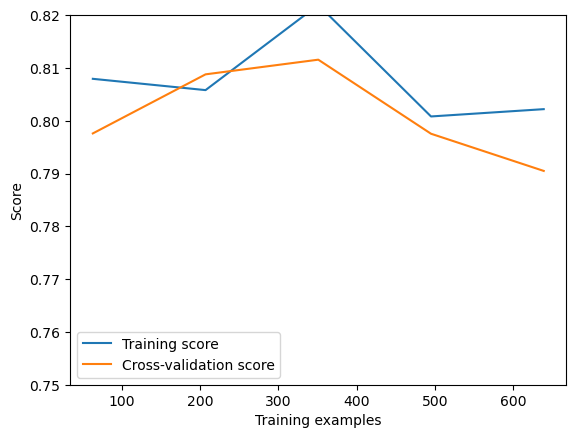

In [64]:
from sklearn.model_selection import cross_val_score, StratifiedKFold, learning_curve
cv_scores = cross_val_score(LR, x_train, y_train, cv=StratifiedKFold(n_splits=10))
print("Cross-validation scores:", cv_scores)
print("Mean accuracy:", cv_scores.mean())
train_sizes, train_scores, test_scores = learning_curve(LR, x_train, y_train, cv=StratifiedKFold(n_splits=10))
plt.plot(train_sizes, train_scores.mean(axis=1), label='Training score')
plt.plot(train_sizes, test_scores.mean(axis=1), label='Cross-validation score')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.ylim(0.75, 0.82)
plt.legend(loc='best')
plt.show()

In [65]:
train2.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,Family
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,21171,7.2500,S,Mr,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,17599,71.2833,C,Mrs,1
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,3101282,7.9250,S,Miss,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs,1
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr,0


In [66]:
train2.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
Title       0
Family      0
dtype: int64

In [67]:
train2=train.rename(columns={'Title':'Tittle'})


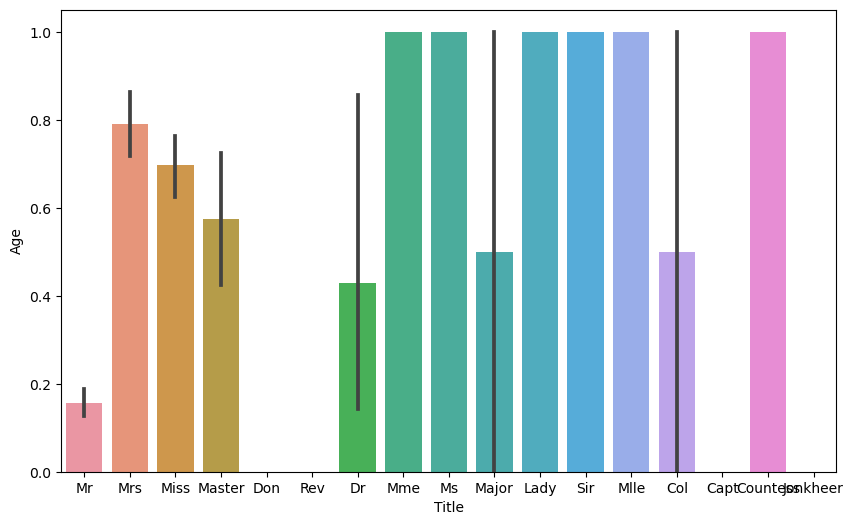

In [68]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Tittle', y='Survived', data=train2)
plt.xlabel('Title')
plt.ylabel('Age')
plt.show()

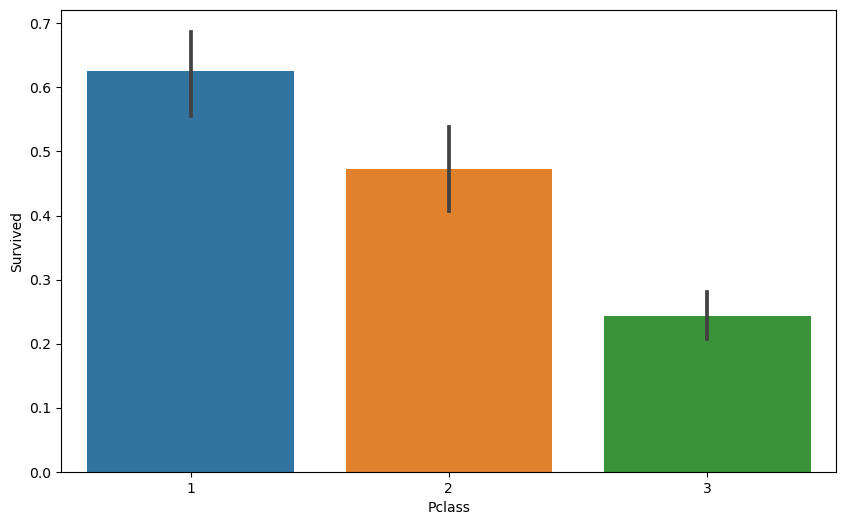

In [69]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Pclass', y='Survived', data=train2)
plt.xlabel('Pclass')
plt.ylabel('Survived')
plt.show()

in Pclass column puclass 1 have more survival rate



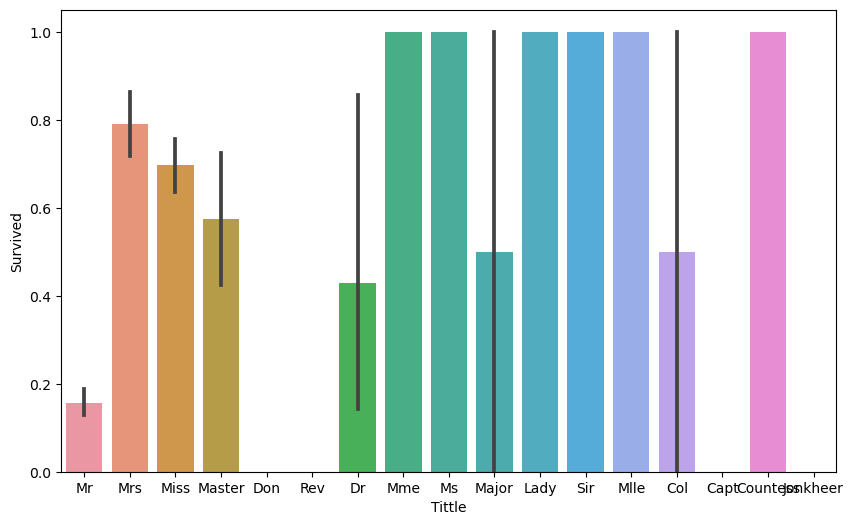

In [70]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Tittle', y='Survived', data=train2)
plt.xlabel('Tittle')
plt.ylabel('Survived')
plt.show()

In [71]:
train2['Tittle'] = train2['Tittle'].replace({'Mme': 'Mrs', 'Mlle': 'Miss'})
train2['Tittle'] = train2['Tittle'].apply(lambda x: x if x in ['Mr', 'Mrs', 'Miss', 'Master'] else 'Other')


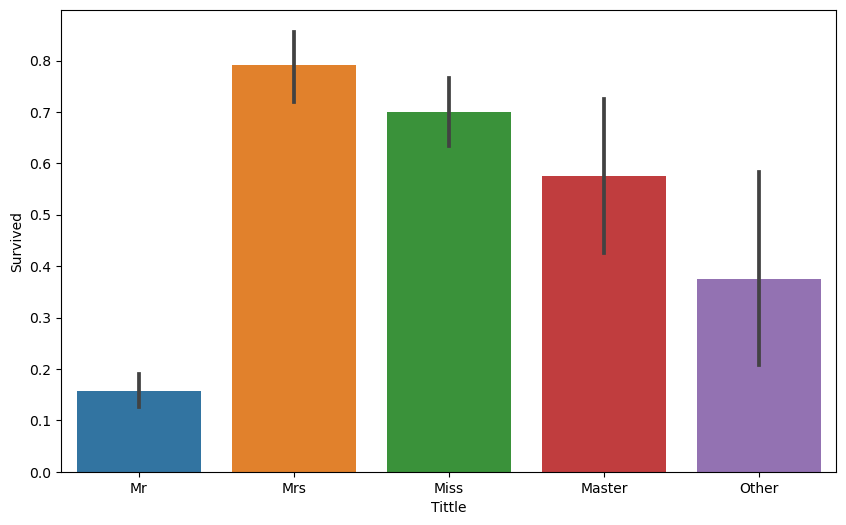

In [72]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Tittle', y='Survived', data=train2)
plt.xlabel('Tittle')
plt.ylabel('Survived')
plt.show()

the survial rate of Mrs in title columns is higher than other Tittle

In [73]:
sur_by_sex=train2.groupby('Sex')['Survived'].sum()
print(sur_by_sex)
most_sur_sex=sur_by_sex.idxmax()
print(most_sur_sex)

Sex
female    231
male      109
Name: Survived, dtype: int64
female


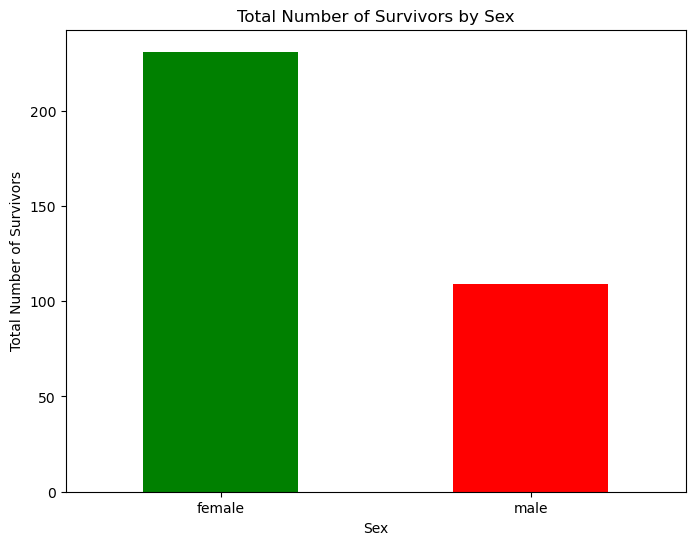

In [74]:
survivors_by_sex = train2.groupby('Sex')['Survived'].sum()
plt.figure(figsize=(8, 6))
survivors_by_sex.plot(kind='bar', color=['green', 'red'])
plt.title('Total Number of Survivors by Sex')
plt.xlabel('Sex')
plt.ylabel('Total Number of Survivors')
plt.xticks(rotation=0)  
plt.show()

The survial rate of female in gender column is higher than the male 

C:\Users\Dell\AppData\Local\Temp\ipykernel_16964\819030724.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survial_rate_categary=train2.groupby('age_categary')['Survived'].sum()


age_categary
child     47
adult    257
elder     35
Name: Survived, dtype: int64


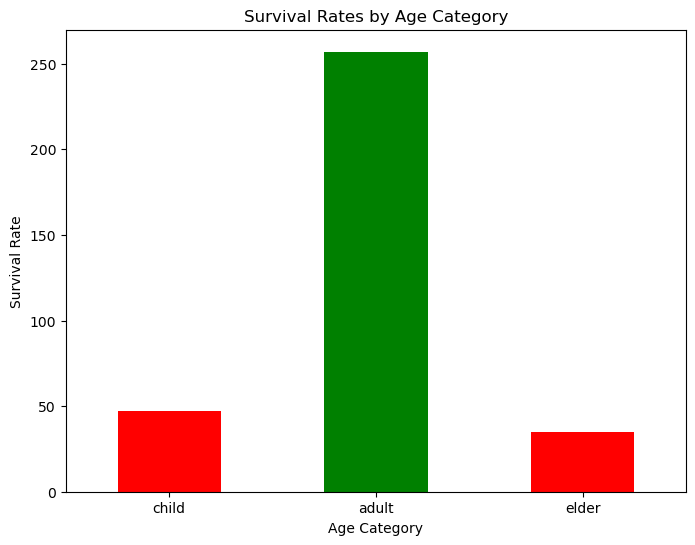

In [75]:
bins=[0,15,48,80]
labels =['child','adult','elder']
train2['age_categary']=pd.cut(train2['Age'],bins=bins,labels=labels,right=False)
survial_rate_categary=train2.groupby('age_categary')['Survived'].sum()
print(survial_rate_categary)
plt.figure(figsize=(8, 6))
survial_rate_categary.plot(kind='bar', color=['red','green','red'])
plt.title('Survival Rates by Age Category')
plt.xlabel('Age Category')
plt.ylabel('Survival Rate')
plt.xticks(rotation=0) 
plt.show()

this describe that the survuval rate of adult in age category is high

Family
0    161
1    179
Name: Survived, dtype: int64


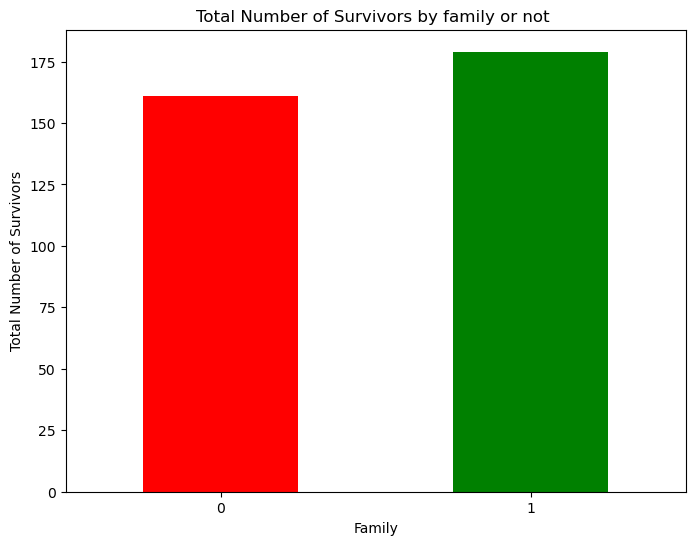

In [76]:
survivors_by_family = train2.groupby('Family')['Survived'].sum()
plt.figure(figsize=(8, 6))
survivors_by_family.plot(kind='bar', color=['red', 'green'])
print(survivors_by_family)
plt.title('Total Number of Survivors by family or not ')
plt.xlabel('Family')
plt.ylabel('Total Number of Survivors')
plt.xticks(rotation=0)  
plt.show()

it describe that the survial rate of peoples who are with over family is slightly higher than without family

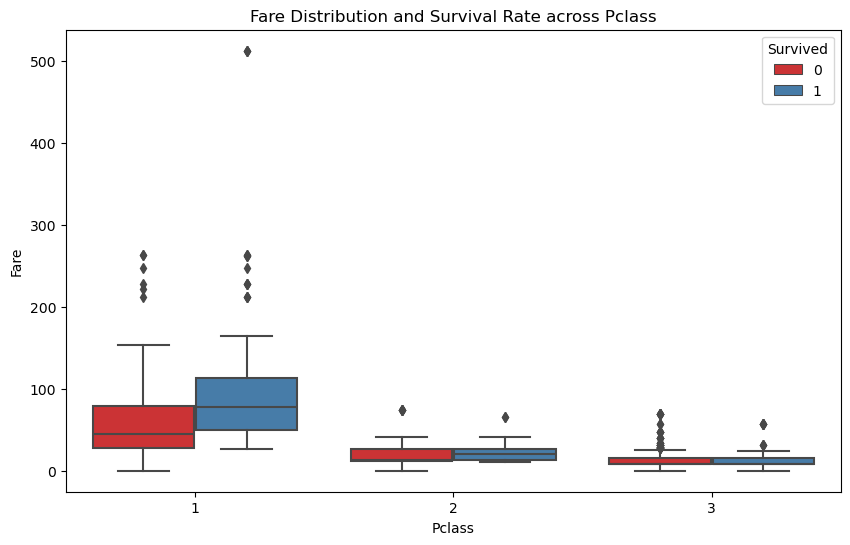

In [77]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Pclass', y='Fare', hue='Survived', data=train2, palette='Set1')
plt.title('Fare Distribution and Survival Rate across Pclass')
plt.xlabel('Pclass')
plt.ylabel('Fare')
plt.show()

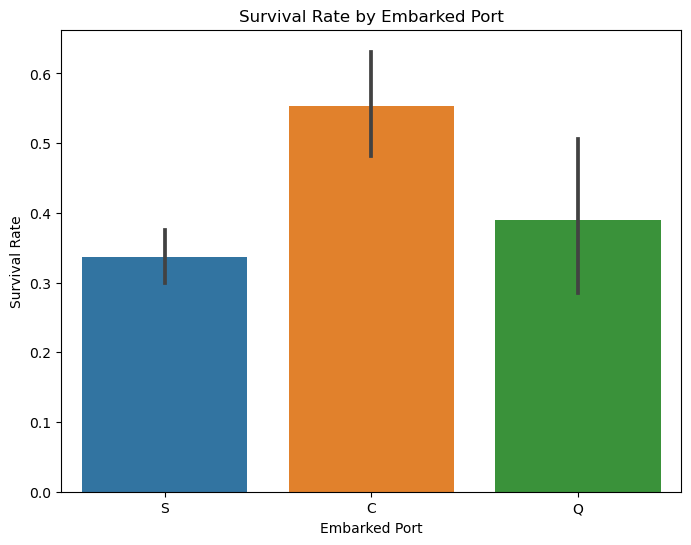

In [78]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Embarked', y='Survived', data=train2)
plt.title('Survival Rate by Embarked Port')
plt.xlabel('Embarked Port')
plt.ylabel('Survival Rate')
plt.show()

Embarkeed port category c has more survival rate 

In [79]:
train3=train2.copy()

In [80]:
del_columns=['Name','Sex','SibSp','Parch','Ticket','Embarked','Embarked_Q','Embarked_C','Embarked_S','Sex_female']
train3.drop(columns=del_columns, inplace=True)

In [81]:
train3.head()

,Survived,Pclass,Age,Fare,Tittle,Family,Sex_male,age_categary
0,0,3,22.0,7.2500,Mr,1,True,adult
1,1,1,38.0,71.2833,Mrs,1,False,adult
2,1,3,26.0,7.9250,Miss,0,False,adult
3,1,1,35.0,53.1000,Mrs,1,False,adult
4,0,3,35.0,8.0500,Mr,0,True,adult


In [82]:
train3.sort_values(by='Fare', inplace=True)


In [83]:
quantile1, quantile3 = np.percentile(train3['Fare'], [25, 75])
iqr = quantile3 - quantile1
lower_bound_value = quantile1 - (1.5 * iqr)
upper_bound_value = quantile3 + (1.5 * iqr)
lower_bound_value = max(0, lower_bound_value)
print(lower_bound_value)
print(upper_bound_value)
outliers = train3[(train3['Fare'] < lower_bound_value) | (train3['Fare'] > upper_bound_value)]
train3 = train3[(train3['Fare'] >= lower_bound_value) & (train3['Fare'] <= upper_bound_value)]


0
65.6563


In [84]:
train3.reset_index(drop=True, inplace=True)

In [85]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import*

In [86]:
train3=train3.rename(columns={'Family':'FamilySize'})

In [87]:
from sklearn.preprocessing import LabelEncoder
lr=LabelEncoder()
for col in train3:
   train3[col]=lr.fit_transform(train3[col])


In [88]:
train3

,Survived,Pclass,Age,Fare,Tittle,FamilySize,Sex_male,age_categary
0,1,2,34,0,2,0,1,0
1,0,2,67,0,2,0,1,2
2,0,2,24,0,2,0,1,0
3,0,0,44,0,2,0,1,0
4,0,1,44,0,2,0,1,0
...,...,...,...,...,...,...,...,...
770,0,0,69,199,2,1,1,2
771,0,0,84,200,2,1,1,2
772,1,0,30,201,2,1,1,0
773,1,1,32,202,1,1,0,0


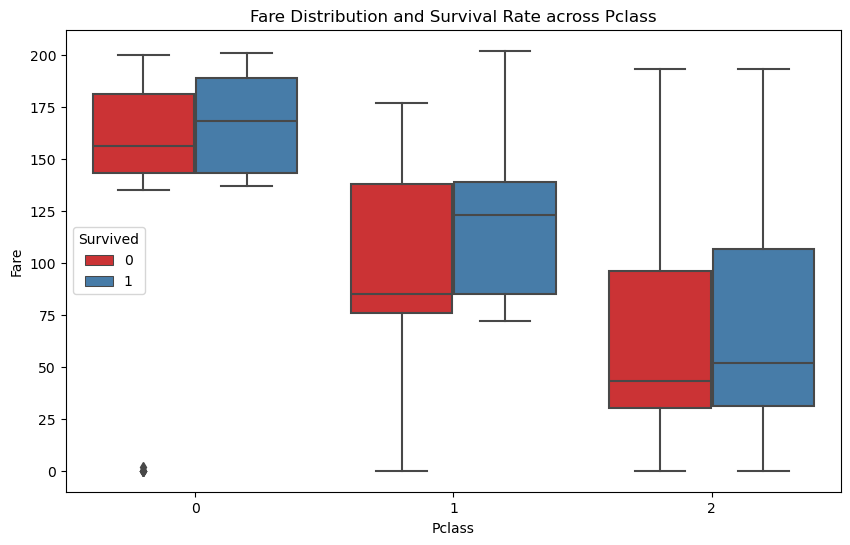

In [89]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Pclass', y='Fare', hue='Survived', data=train3, palette='Set1')
plt.title('Fare Distribution and Survival Rate across Pclass')
plt.xlabel('Pclass')
plt.ylabel('Fare')
plt.show()

In [90]:
y=train3['Survived']
train3.drop(columns='Survived',inplace=True)

In [91]:
train_x,test_x,train_y,train_y=train_test_split(train3,y,test_size=0.2)

In [92]:
LR=LogisticRegression()
LR.fit(x_train,y_train)

LogisticRegression()

In [93]:
y_pred=LR.predict(x_test)

In [94]:
print(y_pred.shape,y_test.shape)

(178,) (178,)


In [95]:
from sklearn.metrics import *

In [96]:
precision_score(y_pred,y_test)

0.6865671641791045

In [97]:
confusion_matrix(y_pred,y_test)

array([[89, 21],
       [22, 46]], dtype=int64)

In [98]:
recall_score(y_pred,y_test)

0.6764705882352942

Cross-validation scores: [0.75       0.77464789 0.76056338 0.88732394 0.83098592 0.78873239
 0.71830986 0.77464789 0.83098592 0.8028169 ]
Mean accuracy: 0.7919014084507043


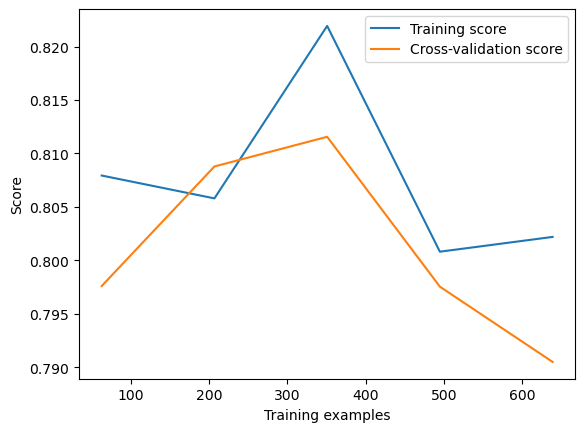

In [99]:
from sklearn.model_selection import cross_val_score, StratifiedKFold, learning_curve
cv_scores = cross_val_score(LR, x_train, y_train, cv=StratifiedKFold(n_splits=10))
print("Cross-validation scores:", cv_scores)
print("Mean accuracy:", cv_scores.mean())

# Plot learning curves using stratified k-fold cross-validation
train_sizes, train_scores, test_scores = learning_curve(LR, x_train, y_train, cv=StratifiedKFold(n_splits=10))
plt.plot(train_sizes, train_scores.mean(axis=1), label='Training score')
plt.plot(train_sizes, test_scores.mean(axis=1), label='Cross-validation score')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.legend(loc='best')
plt.show()

In [100]:
train['Ticket'].unique()

array(['21171', '17599', '3101282', '113803', '373450', '330877', '17463',
       '349909', '347742', '237736', '9549', '113783', '2151', '347082',
       '350406', '248706', '382652', '244373', '345763', '2649', '239865',
       '248698', '330923', '113788', '347077', '2631', '19950', '330959',
       '349216', '17601', '17569', '335677', '24579', '17604', '113789',
       '2677', '2152', '345764', '2651', '7546', '11668', '349253',
       '2123', '330958', '23567', '370371', '14311', '2662', '349237',
       '3101295', '39886', '17572', '2926', '113509', '19947', '31026',
       '2697', '34651', '2144', '2669', '36973', '347088', '17605',
       '2661', '29395', '3464', '3101281', '315151', '33111', '14879',
       '2680', '1601', '348123', '349208', '374746', '248738', '364516',
       '345767', '345779', '330932', '113059', '14885', '3101278', '6608',
       '392086', '343275', '343276', '347466', '5734', '2315', '364500',
       '374910', '17754', '17759', '231919', '244367', '349

In [101]:
train1=train.copy()
del_columns=['Name','Sex','SibSp','Parch','Ticket','Embarked','Title','Embarked_C','Sex_female']
train1.drop(columns=del_columns, inplace=True)
train1=train1.rename(columns={'Family':'FamilySize'})
train1 = train1[['Survived', 'Pclass', 'Age', 'Fare', 'FamilySize', 'Sex_male', 'Embarked_Q', 'Embarked_S']]
from sklearn.preprocessing import LabelEncoder
lr=LabelEncoder()
for col in train1:
    train1[col]=lr.fit_transform(train1[col])



In [102]:
y=train1['Survived']
train1.drop('Survived',axis=1,inplace=True)

In [103]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [104]:
x_train, x_test, y_train, y_test = train_test_split(train1, y, test_size=0.2, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)



In [105]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)
x_test = scaler.transform(x_test)

In [106]:
epochs = 1000
LR = LogisticRegression()
LR.fit(x_train, y_train)
for epoch in range(epochs):
    LR.fit(x_train, y_train)

In [107]:
y_val_pred = LR.predict(x_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"Epoch {epoch+1}/{epochs} - Validation Accuracy: {val_accuracy}")


Epoch 1000/1000 - Validation Accuracy: 0.7692307692307693


In [108]:
y_test_pred = LR.predict(x_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Final Testing Accuracy: {test_accuracy}")

Final Testing Accuracy: 0.797752808988764


In [109]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression())
])
param_grid = {
    'clf__C': [0.001, 0.01, 0.1, 1, 10, 100],  
    'clf__penalty': ['l1', 'l2'],                
    'clf__solver': ['liblinear', 'saga']         
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)


print("Best Hyperparameters:", grid_search.best_params_)

best_model = grid_search.best_estimator_
test_accuracy = best_model.score(x_test, y_test)
print("Testing Accuracy with Best Model:", test_accuracy)


Best Hyperparameters: {'clf__C': 0.01, 'clf__penalty': 'l2', 'clf__solver': 'saga'}
Testing Accuracy with Best Model: 0.8033707865168539


In [183]:
train1=train.copy()
del_columns=['Name','Sex','SibSp','Parch','Ticket','Embarked','Title','Embarked_C','Sex_female']
train1.drop(columns=del_columns, inplace=True)
train1=train1.rename(columns={'Family':'FamilySize'})
train1 = train1[['Survived', 'Pclass', 'Age', 'Fare', 'FamilySize', 'Sex_male', 'Embarked_Q', 'Embarked_S']]
from sklearn.preprocessing import LabelEncoder
lr=LabelEncoder()
for col in train1:
    train1[col]=lr.fit_transform(train1[col])


In [219]:
y=train1['Survived']
train1.drop('Survived',axis=1,inplace=True)

In [223]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(train1, y, test_size = 0.33, random_state = 42)

In [227]:
x_train.shape, x_test.shape

((595, 7), (294, 7))

In [229]:
y_train.shape,y_test.shape

((595,), (294,))

In [235]:
from sklearn.tree import DecisionTreeClassifier
lr=DecisionTreeClassifier(criterion='gini', max_depth=3)


In [237]:

lr.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [243]:
y_pred_ = lr.predict(x_test)

In [249]:
y_pred_train = lr.predict(x_train)

In [251]:
from sklearn.metrics import accuracy_score,classification_report

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_)))
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))
print(classification_report(y_pred_,y_test))

Model accuracy score with criterion gini index: 0.8197
Training-set accuracy score: 0.8202
              precision    recall  f1-score   support

           0       0.88      0.84      0.86       191
           1       0.73      0.78      0.75       103

    accuracy                           0.82       294
   macro avg       0.80      0.81      0.80       294
weighted avg       0.82      0.82      0.82       294

